In [9]:
import yfinance as yf
import pandas as pd

def get_sp500_data(start_date, end_date):
    """Downloads historical S&P 500 data using yfinance."""
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

if __name__ == '__main__':
    start_date = '2000-01-01'  # Adjust the start date as needed
    end_date = pd.Timestamp('now').strftime('%Y-%m-%d')

    sp500_data = get_sp500_data(start_date, end_date)

    if sp500_data.empty:
        print(f"No S&P 500 data downloaded for the period {start_date} to {end_date}")
    else:
        print("First 10 rows of S&P 500 data:")
        print(sp500_data.head(10))

        print("Columns of sp500_data:")
        print(sp500_data.columns)

        # Calculate monthly returns using the 'Close' price
        sp500_data['Monthly Return'] = sp500_data[('Close', '^GSPC')].pct_change().groupby(pd.Grouper(freq='M')).transform(lambda x: (1 + x).prod() - 1)

        # Example: Extract month and day of week
        sp500_data['Month'] = sp500_data.index.month
        sp500_data['DayofWeek'] = sp500_data.index.day_name()

        print("\nS&P 500 data with monthly returns (using Close price), month, and day of week:")
        print(sp500_data.head(10))

        # Further analysis to identify seasonality would involve grouping and aggregating
        # these new columns.

[*********************100%***********************]  1 of 1 completed

First 10 rows of S&P 500 data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000
2000-01-10  1457.599976  1464.359985  1441.469971  1441.469971  1064800000
2000-01-11  1438.560059  1458.660034  1434.420044  1457.599976  1014000000
2000-01-12  1432.250000  1442.599976  1427.079956  1438.560059   974600000
2000-01-13  1449.680054  1454.199951  1432.250000  1432.250000  1030400000
2000-01-14  1465.150024  1473.000000  1449.680054  1449.680054  10859


C:\Users\jamal\AppData\Local\Temp\ipykernel_26440\448778595.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_data['Monthly Return'] = sp500_data[('Close', '^GSPC')].pct_change().groupby(pd.Grouper(freq='M')).transform(lambda x: (1 + x).prod() - 1)


In [2]:
print("Columns of sp500_data:")
print(sp500_data.columns)

Columns of sp500_data:
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


In [21]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-01-02 to 2023-12-29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           5033 non-null   float64
 1   High            5033 non-null   float64
 2   Low             5033 non-null   float64
 3   Open            5033 non-null   float64
 4   Volume          5033 non-null   int64  
 5   Year            5033 non-null   int32  
 6   Month           5033 non-null   int32  
 7   Monthly Return  5032 non-null   float64
dtypes: float64(5), int32(2), int64(1)
memory usage: 314.6 KB


[*********************100%***********************]  1 of 1 completed
C:\Users\jamal\AppData\Local\Temp\ipykernel_26440\3441036420.py:21: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_table = sp500.pivot_table(values='Return', index='Month', columns='Day', aggfunc='mean') * 100


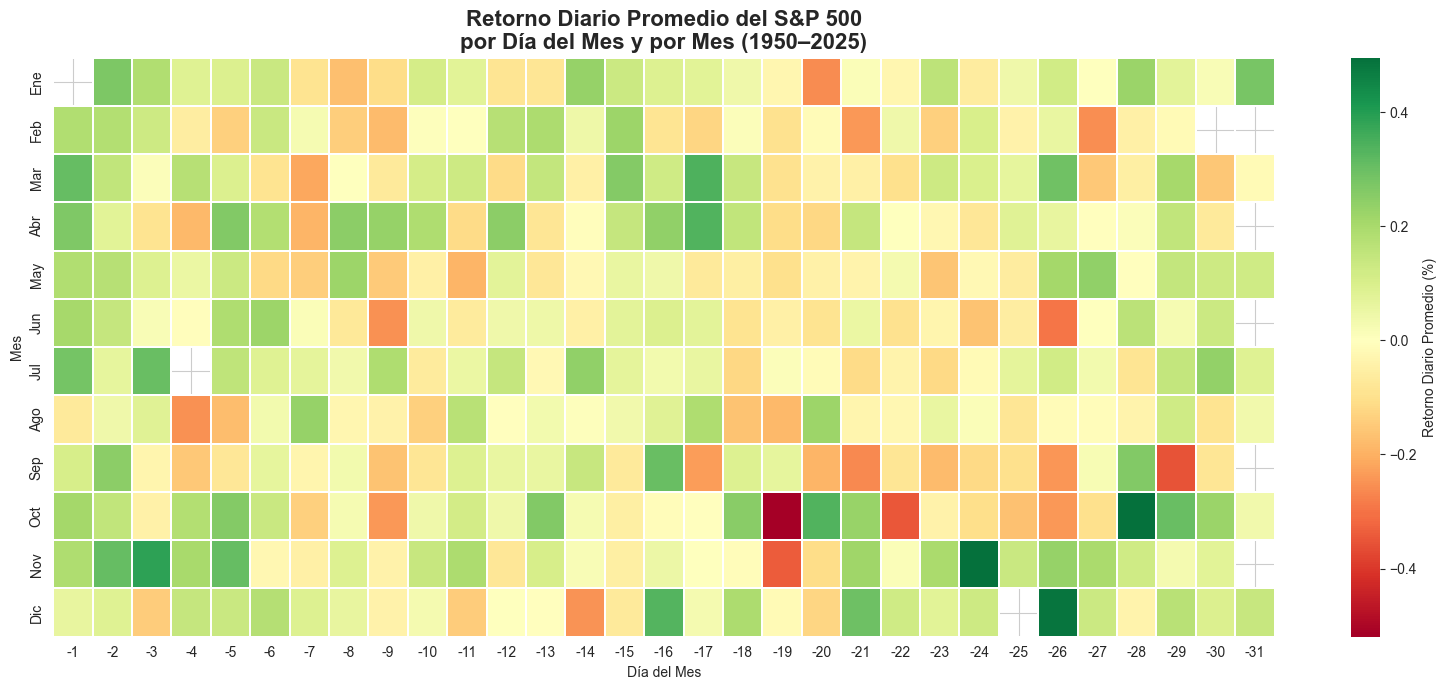

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar datos históricos del S&P 500
start_date = '1950-01-01'
end_date = '2025-12-31'
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Calcular retorno diario
sp500['Return'] = sp500['Close'].pct_change()
sp500 = sp500.dropna()

# Extraer día y mes
sp500['Day'] = sp500.index.day
sp500['Month'] = sp500.index.month

# Crear tabla de retorno promedio por día de cada mes
pivot_table = sp500.pivot_table(values='Return', index='Month', columns='Day', aggfunc='mean') * 100

# Nombres de meses
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
pivot_table.index = month_names

# Graficar heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(pivot_table, cmap='RdYlGn', center=0, annot=False, fmt=".2f", linewidths=.3, cbar_kws={'label': 'Retorno Diario Promedio (%)'})
plt.title('Retorno Diario Promedio del S&P 500\npor Día del Mes y por Mes (1950–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Día del Mes')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


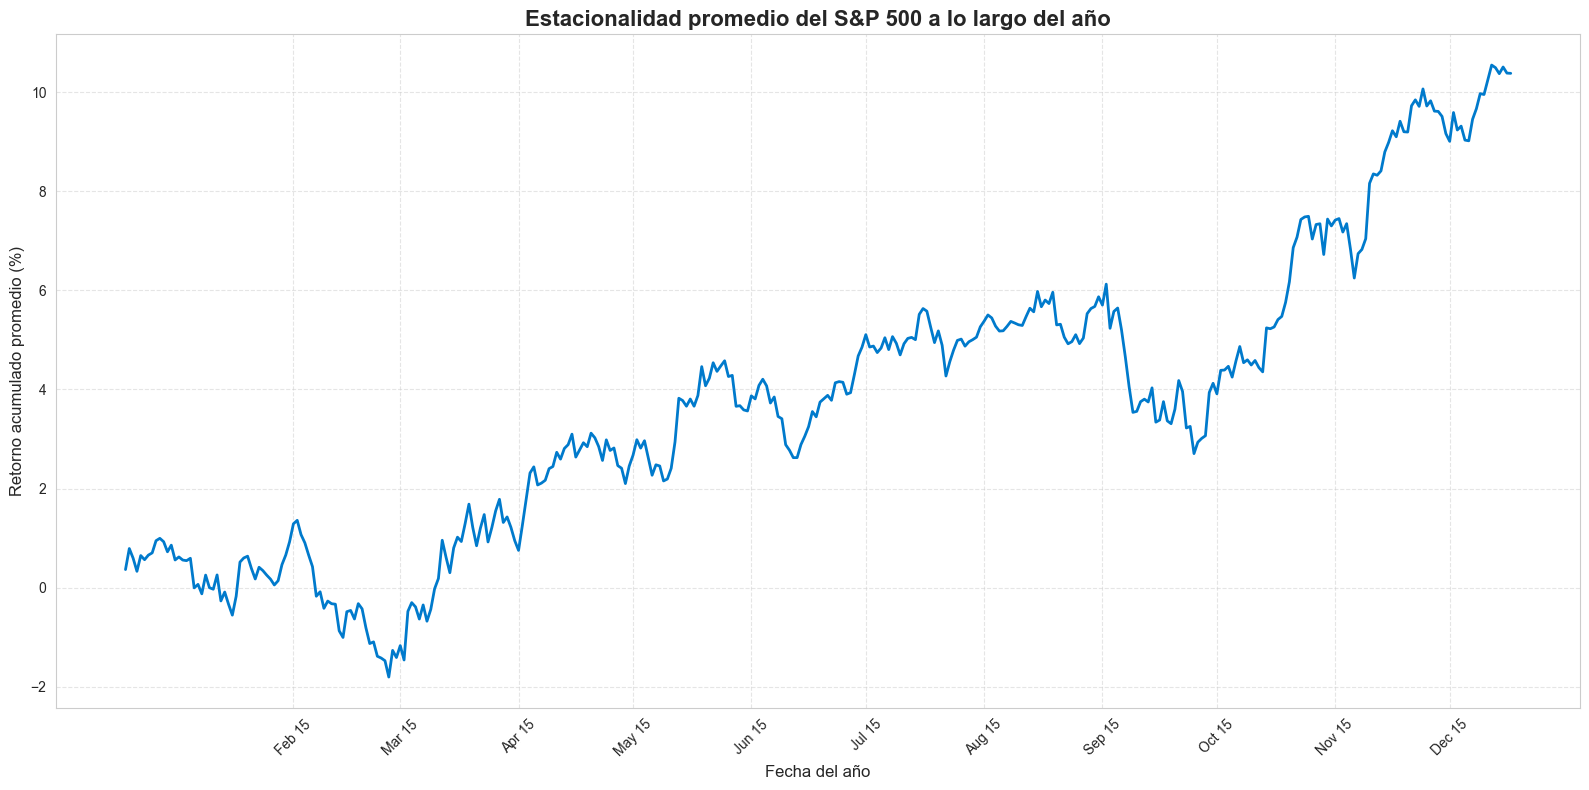

[*********************100%***********************]  1 of 1 completed
C:\Users\jamal\AppData\Local\Temp\ipykernel_26440\1109365578.py:81: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jamal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


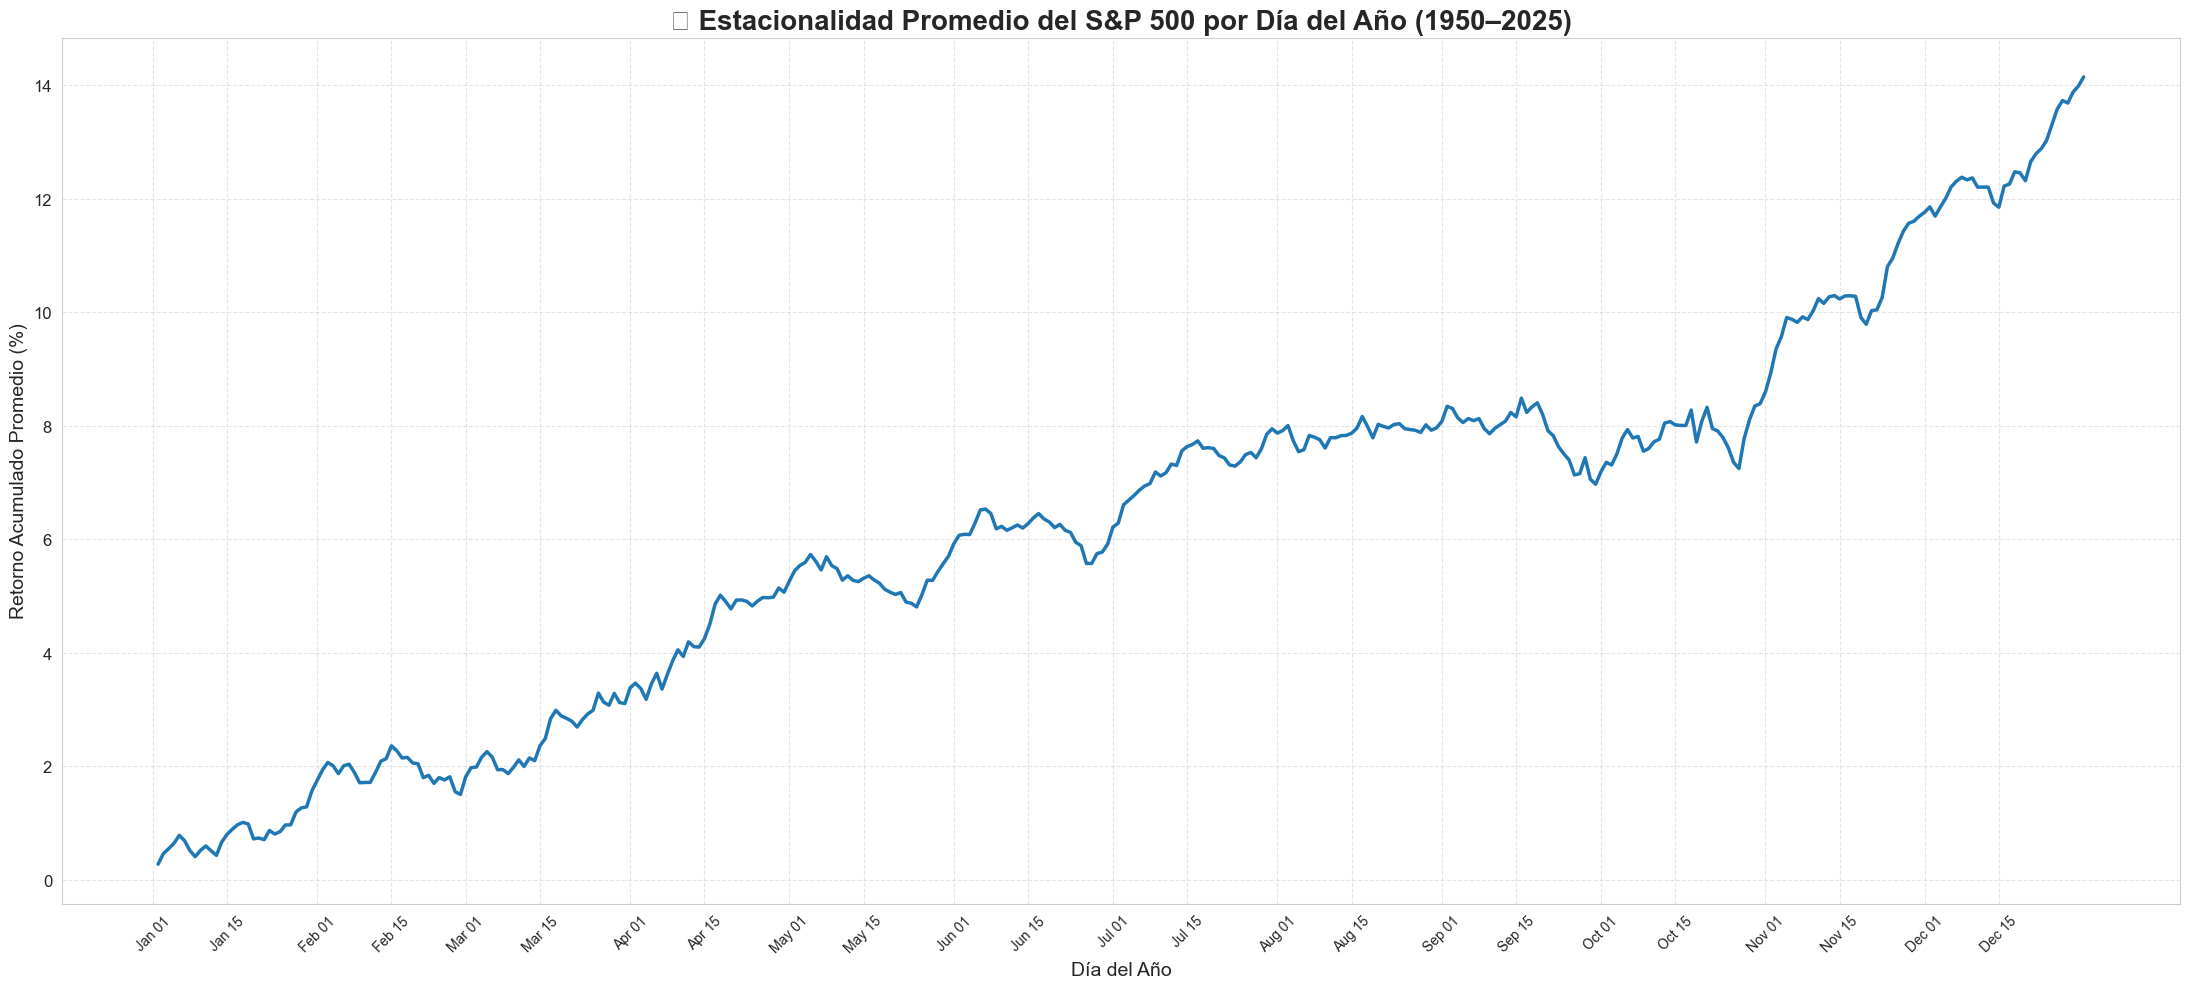

In [45]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos diarios del S&P 500
sp500 = yf.download('^GSPC', start='2000-01-01', end='2025-12-31')
sp500['Return'] = sp500['Close'].pct_change()
sp500 = sp500.dropna()

# Crear columna 'MonthDay' (mm-dd) para agrupar por día del año
sp500['MonthDay'] = sp500.index.strftime('%m-%d')

# Eliminar 29 de febrero para evitar errores en años no bisiestos
sp500 = sp500[sp500['MonthDay'] != '02-29']

# Agrupar por día del año y calcular retorno medio
daily_mean_returns = sp500.groupby('MonthDay')['Return'].mean()

# Retorno acumulado promedio a lo largo del año
cumulative_returns = (1 + daily_mean_returns).cumprod() - 1
cumulative_returns *= 100  # Convertir a %

# Convertir índice a fechas usando año ficticio 2022 (no bisiesto)
cumulative_returns.index = pd.to_datetime('2022-' + cumulative_returns.index)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(cumulative_returns.index, cumulative_returns.values, color='#007acc', linewidth=2)

# Etiquetas en el eje X: el día 15 de cada mes
ticks = pd.date_range('2022-01-15', '2022-12-15', freq='MS') + pd.Timedelta(days=14)
plt.xticks(ticks, [d.strftime('%b %d') for d in ticks], rotation=45)

plt.title('Estacionalidad promedio del S&P 500 a lo largo del año', fontsize=16, fontweight='bold')
plt.xlabel('Fecha del año', fontsize=12)
plt.ylabel('Retorno acumulado promedio (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos diarios del S&P 500
sp500 = yf.download('^GSPC', start='1950-01-01', end='2025-12-31')
sp500['Return'] = sp500['Close'].pct_change()
sp500 = sp500.dropna()

# Crear columna mes-día
sp500['MonthDay'] = sp500.index.strftime('%m-%d')
sp500 = sp500[sp500['MonthDay'] != '02-29']  # eliminar 29 de feb

# Retorno medio por día del año
daily_mean_returns = sp500.groupby('MonthDay')['Return'].mean()
cumulative_returns = (1 + daily_mean_returns).cumprod() - 1
cumulative_returns *= 100  # a porcentaje

# Convertir índice a fechas en un año ficticio
cumulative_returns.index = pd.to_datetime('2022-' + cumulative_returns.index)

# Etiquetas en eje X: 1 y 15 de cada mes
ticks_1 = pd.date_range('2022-01-01', '2022-12-01', freq='MS')
ticks_15 = ticks_1 + pd.Timedelta(days=14)
xticks = sorted(ticks_1.tolist() + ticks_15.tolist())
xtick_labels = [d.strftime('%b %d') for d in xticks]

# --- Plot ---
plt.figure(figsize=(22, 10))  # Más ancho y alto
plt.plot(cumulative_returns.index, cumulative_returns.values, color='#1f77b4', linewidth=2.5)

# Estética para presentación
plt.title('📈 Estacionalidad Promedio del S&P 500 por Día del Año (1950–2025)', fontsize=20, fontweight='bold')
plt.xlabel('Día del Año', fontsize=14)
plt.ylabel('Retorno Acumulado Promedio (%)', fontsize=14)
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Fondo blanco y líneas suaves
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\jamal\AppData\Local\Temp\ipykernel_26440\1906259993.py:55: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\jamal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


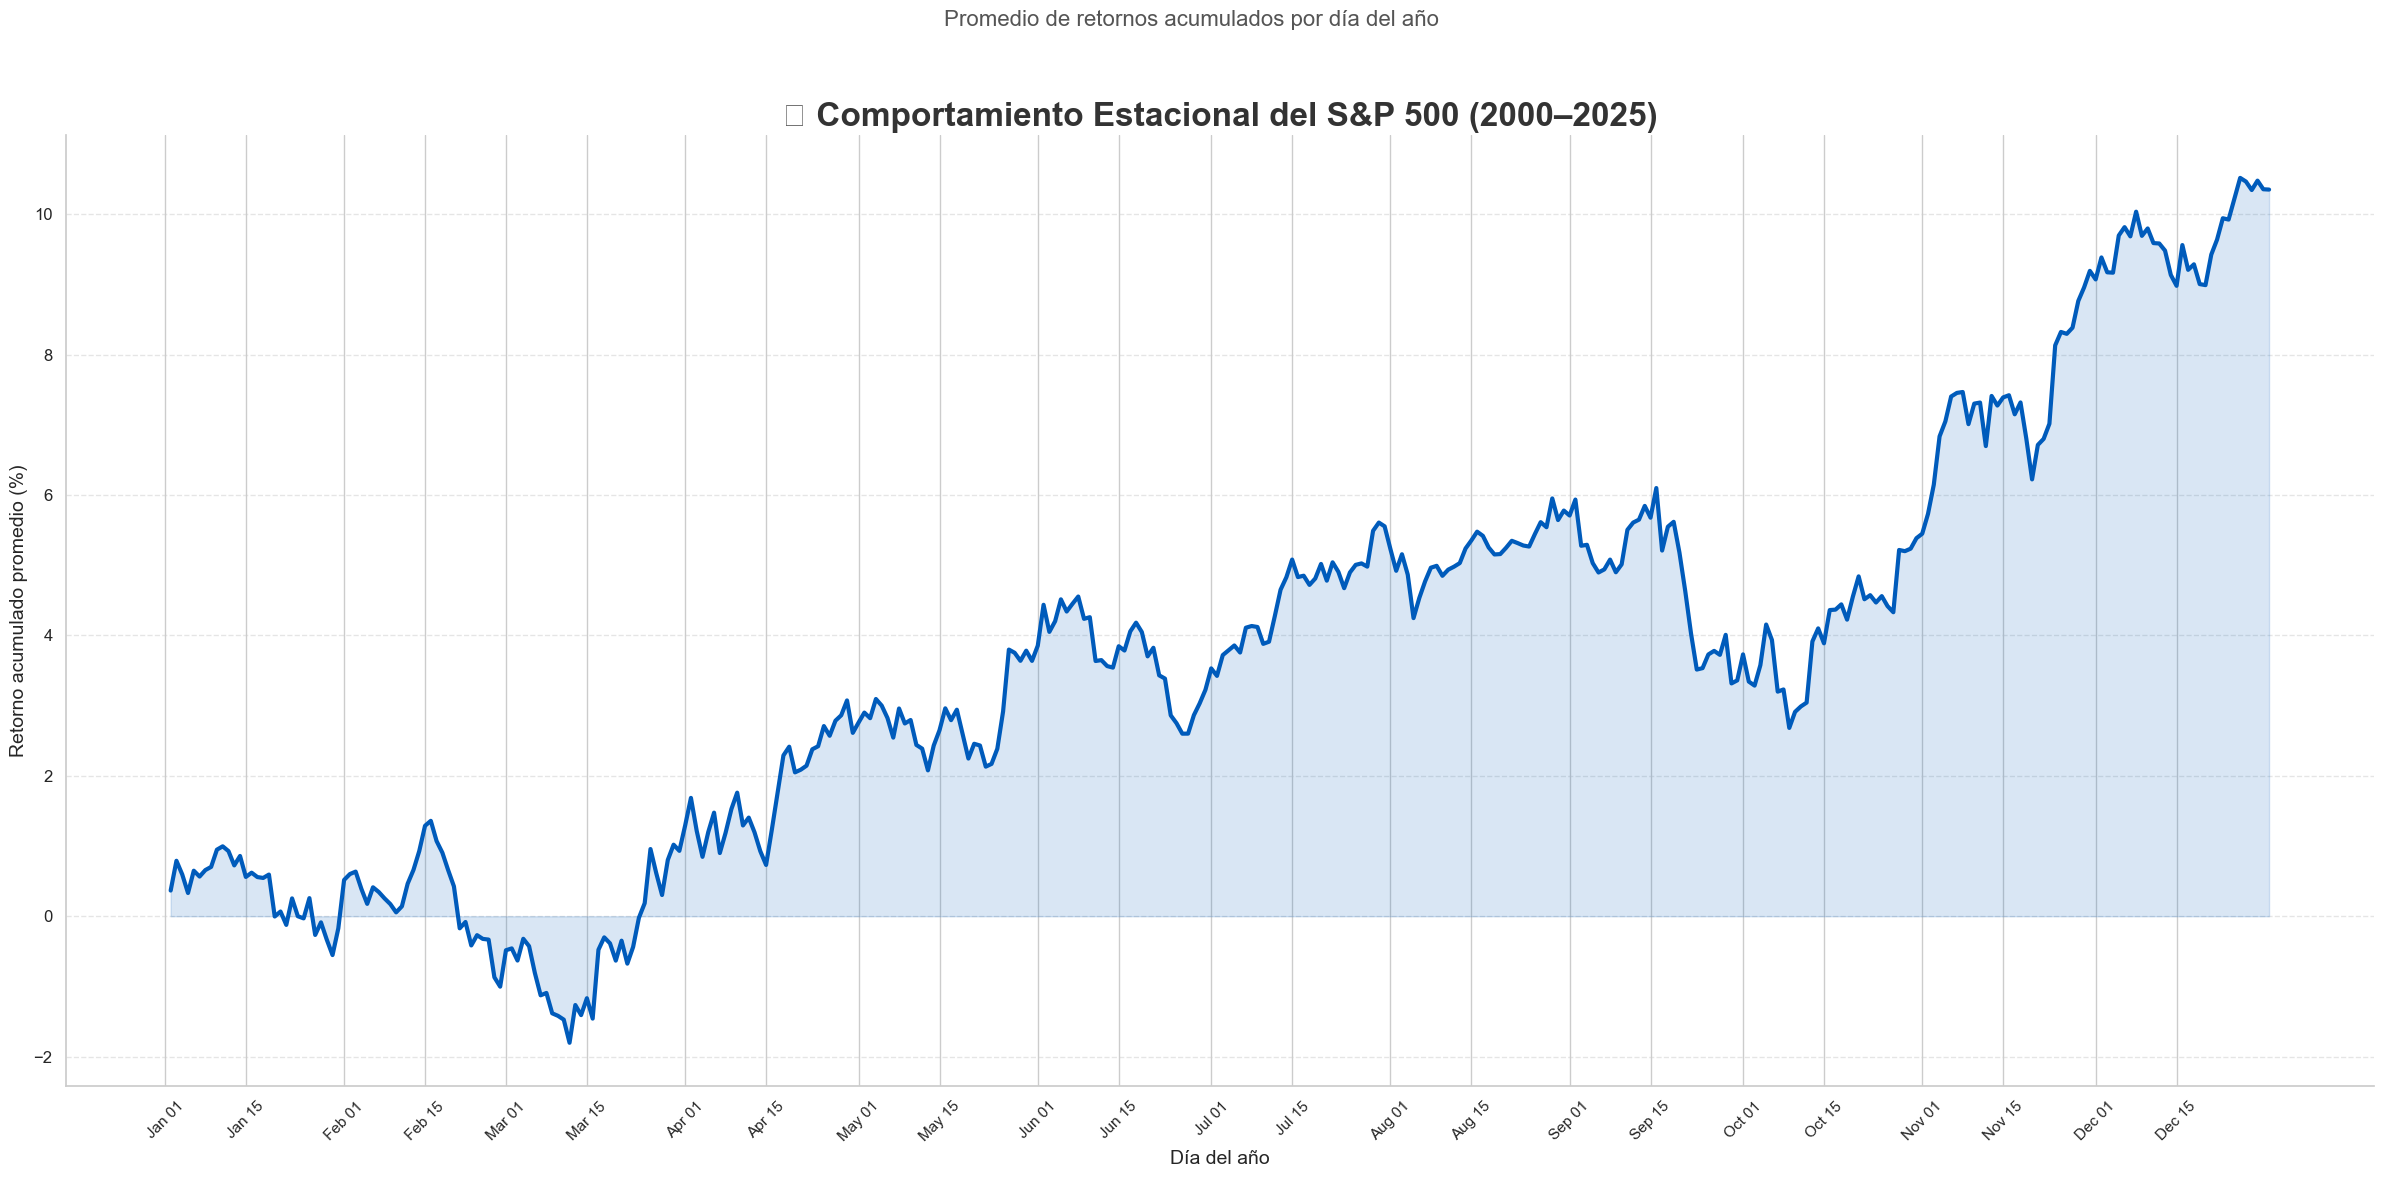

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# Descargar datos diarios del S&P 500
sp500 = yf.download('^GSPC', start='2000-01-01', end='2025-12-31')
sp500['Return'] = sp500['Close'].pct_change()
sp500.dropna(inplace=True)

# Crear columna 'MonthDay' (mm-dd) para agrupar por día del año
sp500['MonthDay'] = sp500.index.strftime('%m-%d')
sp500 = sp500[sp500['MonthDay'] != '02-29']  # Eliminar 29 de febrero

# Calcular retorno promedio por día del año
daily_mean_returns = sp500.groupby('MonthDay')['Return'].mean()
cumulative_returns = (1 + daily_mean_returns).cumprod() - 1
cumulative_returns *= 100  # A porcentaje

# Convertir índice a fechas con año ficticio 2022
cumulative_returns.index = pd.to_datetime('2022-' + cumulative_returns.index)

# Ejes X con día 1 y 15 de cada mes
ticks_1 = pd.date_range('2022-01-01', '2022-12-01', freq='MS')
ticks_15 = ticks_1 + pd.Timedelta(days=14)
xticks = sorted(ticks_1.tolist() + ticks_15.tolist())
xtick_labels = [d.strftime('%b %d') for d in xticks]

# Paleta moderna
sns.set_theme(style="whitegrid")
color = sns.color_palette("coolwarm", as_cmap=True)

# --- Gráfico ---
plt.figure(figsize=(24, 12))
line = plt.plot(cumulative_returns.index, cumulative_returns.values, color='#005BBB', linewidth=3, label='Retorno acumulado')
plt.fill_between(cumulative_returns.index, cumulative_returns.values, color='#005BBB', alpha=0.15)

# Títulos
plt.title('📆 Comportamiento Estacional del S&P 500 (2000–2025)', fontsize=24, fontweight='bold', color='#333')
plt.suptitle('Promedio de retornos acumulados por día del año', fontsize=16, color='#555')

# Ejes
plt.xlabel('Día del año', fontsize=14)
plt.ylabel('Retorno acumulado promedio (%)', fontsize=14)
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Estética visual
plt.gca().set_facecolor('white')
plt.gca().spines[['top', 'right']].set_visible(False)

# Formato y mostrar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\jamal\AppData\Local\Temp\ipykernel_26440\2751746968.py:73: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\jamal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


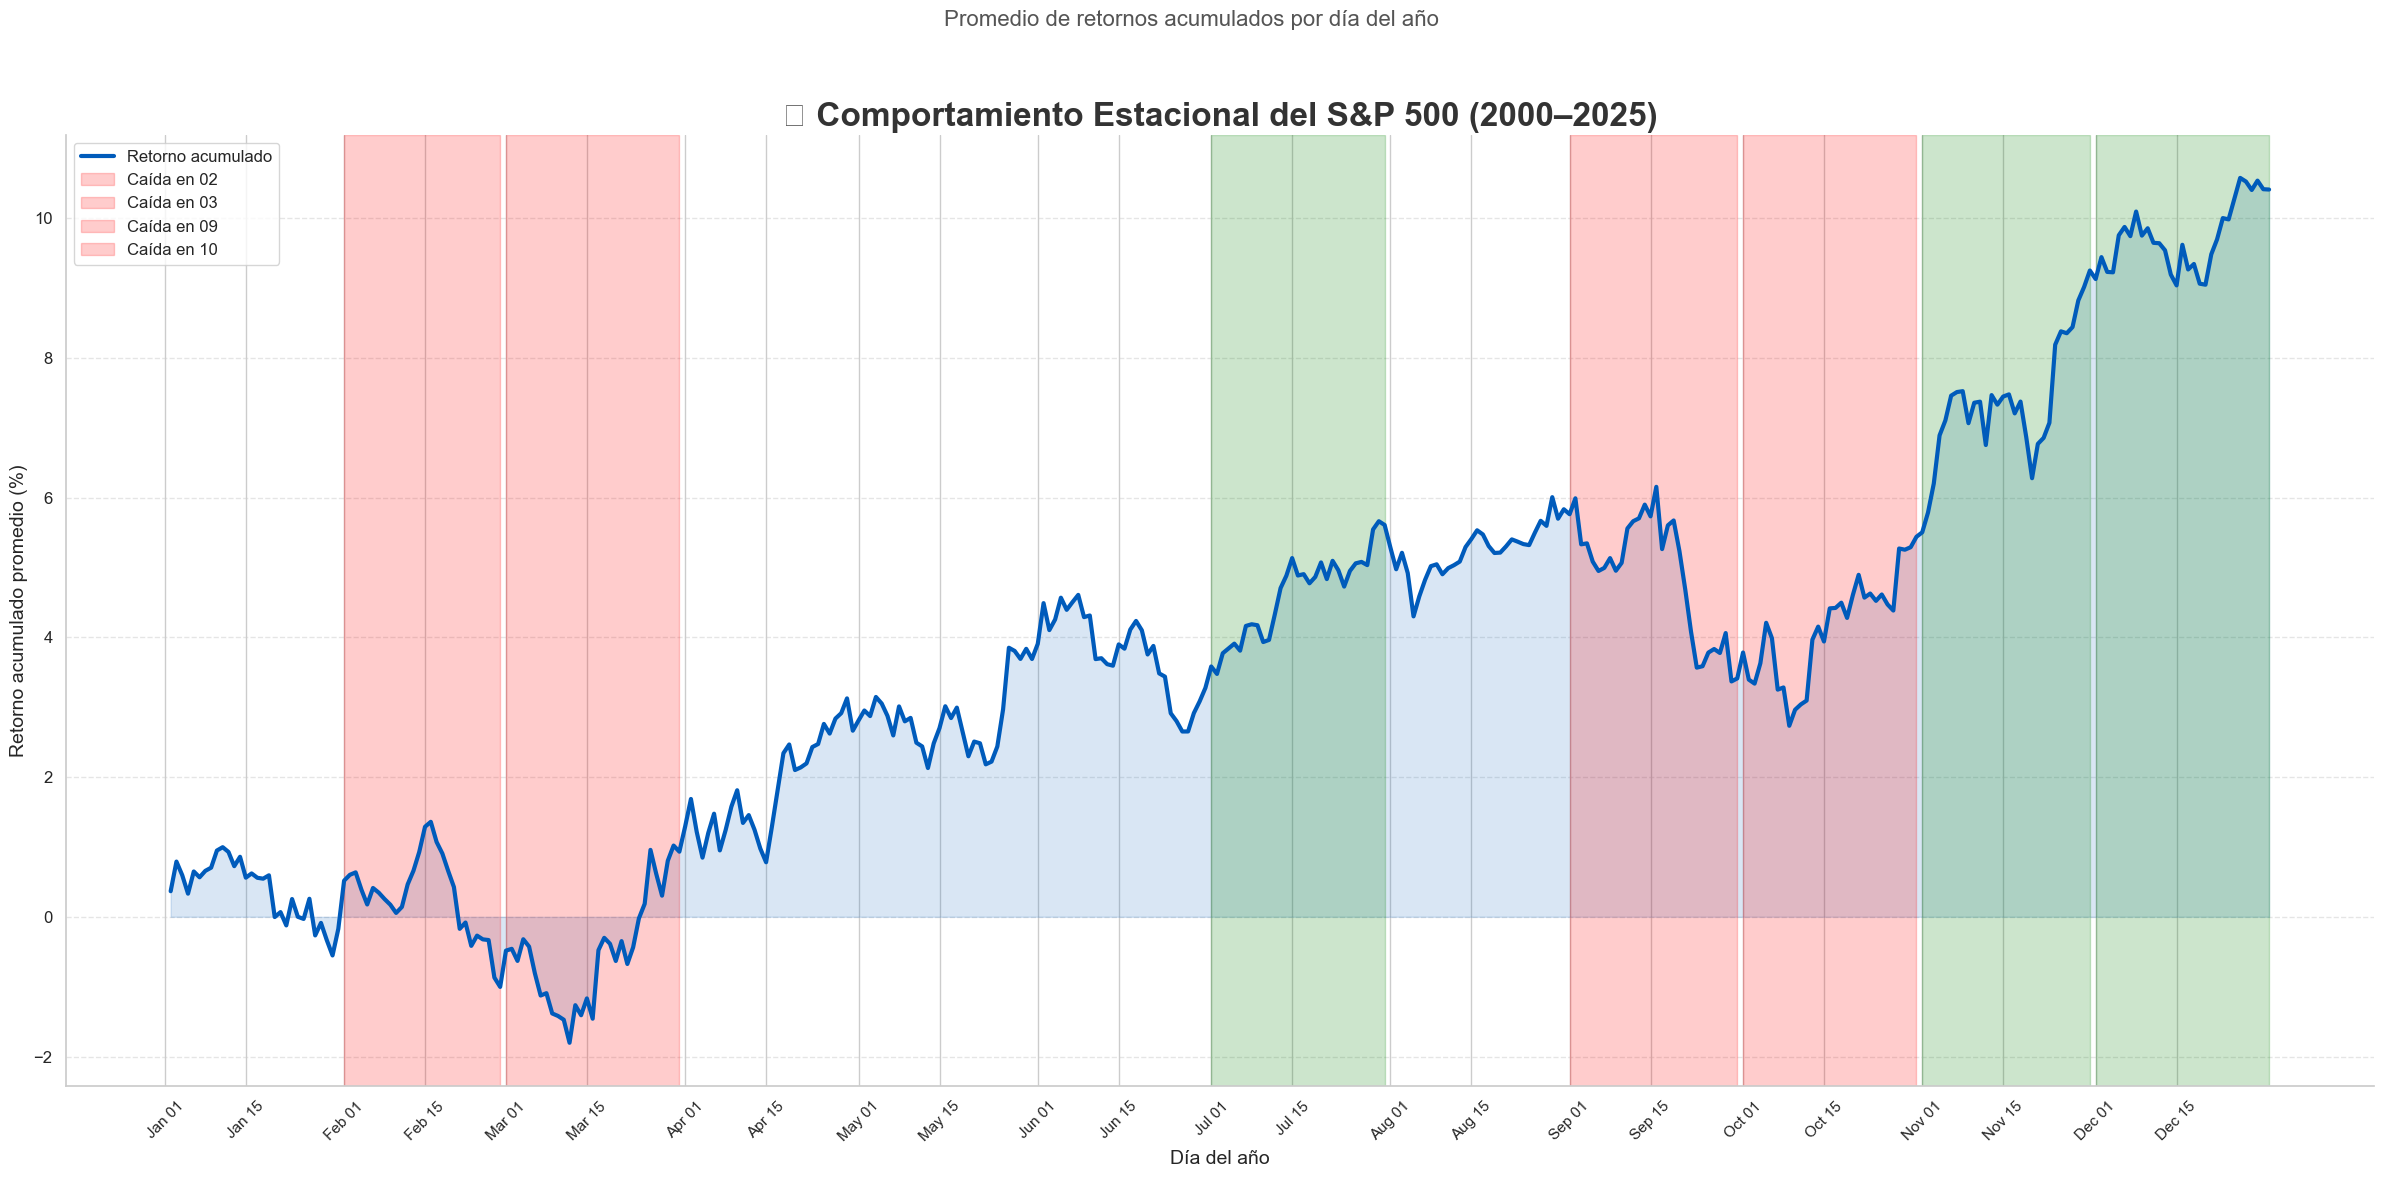

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# Descargar datos diarios del S&P 500
sp500 = yf.download('^GSPC', start='2000-01-01', end='2025-12-31')
sp500['Return'] = sp500['Close'].pct_change()
sp500.dropna(inplace=True)

# Crear columna 'MonthDay' (mm-dd) para agrupar por día del año
sp500['MonthDay'] = sp500.index.strftime('%m-%d')
sp500 = sp500[sp500['MonthDay'] != '02-29']  # Eliminar 29 de febrero

# Calcular retorno promedio por día del año
daily_mean_returns = sp500.groupby('MonthDay')['Return'].mean()
cumulative_returns = (1 + daily_mean_returns).cumprod() - 1
cumulative_returns *= 100  # A porcentaje

# Convertir índice a fechas con año ficticio 2022
cumulative_returns.index = pd.to_datetime('2022-' + cumulative_returns.index)

# Ejes X con día 1 y 15 de cada mes
ticks_1 = pd.date_range('2022-01-01', '2022-12-01', freq='MS')
ticks_15 = ticks_1 + pd.Timedelta(days=14)
xticks = sorted(ticks_1.tolist() + ticks_15.tolist())
xtick_labels = [d.strftime('%b %d') for d in xticks]

# Paleta moderna
sns.set_theme(style="whitegrid")
color = sns.color_palette("coolwarm", as_cmap=True)

# --- Gráfico ---
plt.figure(figsize=(24, 12))
line = plt.plot(cumulative_returns.index, cumulative_returns.values, color='#005BBB', linewidth=3, label='Retorno acumulado')
plt.fill_between(cumulative_returns.index, cumulative_returns.values, color='#005BBB', alpha=0.15)

# Establecer los meses críticos de caída y subida
fall_months = ['02', '03', '09', '10']  # Mar, Abr, Sep, Oct
rise_months = ['07','11', '12']  # Nov, Dic

# Marcar zonas de caída (rojo claro)
for month in fall_months:
    month_dates = cumulative_returns.index[cumulative_returns.index.month == int(month)]
    plt.axvspan(month_dates.min(), month_dates.max(), color='red', alpha=0.2, label=f'Caída en {month}')

# Marcar zonas de subida (verde claro)
for month in rise_months:
    month_dates = cumulative_returns.index[cumulative_returns.index.month == int(month)]
    plt.axvspan(month_dates.min(), month_dates.max(), color='green', alpha=0.2, label=f'Subida en {month}')

# Títulos
plt.title('📆 Comportamiento Estacional del S&P 500 (2000–2025)', fontsize=24, fontweight='bold', color='#333')
plt.suptitle('Promedio de retornos acumulados por día del año', fontsize=16, color='#555')

# Ejes
plt.xlabel('Día del año', fontsize=14)
plt.ylabel('Retorno acumulado promedio (%)', fontsize=14)
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Estética visual
plt.gca().set_facecolor('white')
plt.gca().spines[['top', 'right']].set_visible(False)

# Añadir leyenda para zonas de caída y subida
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:5], labels[:5], loc='upper left', fontsize=12)

# Formato y mostrar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
